3.4 data discretization <br />
- how to convert continuous numeric values into discrete intervals 
- this process is generally known as discretization or binning 
- helpful in cases where the distribution of data is skewed 
- covering equal width and equal frequency discretization 

3.4.1 equal width discretization

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\chris\AppData\Local\Temp\ipykernel_22324\2361203226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data['price'])


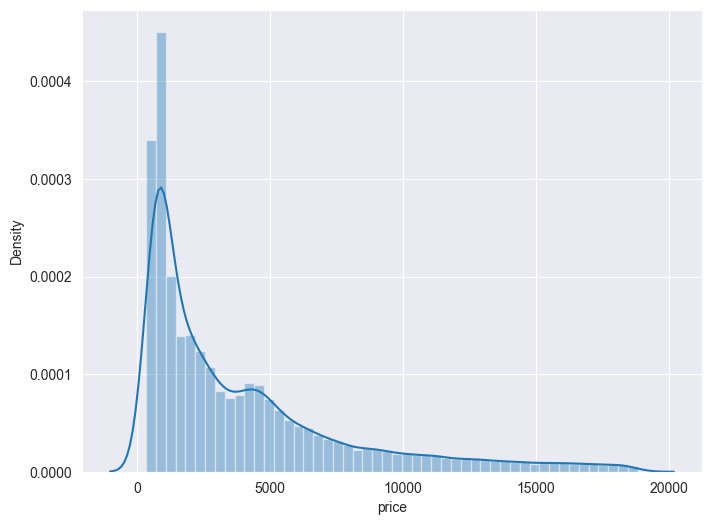

In [3]:
sns.distplot(diamond_data['price'])
plt.show()

In [4]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range)

18497


In [5]:
intervals = 10 
low_bound = int(np.floor(diamond_data['price'].min()))
up_bound = int(np.floor(diamond_data['price'].max()))

interval_length = int(np.round(price_range/intervals))
print(low_bound)
print(up_bound)
print(interval_length)

326
18823
1850


In [6]:
all_bins = [bin for bin in range(low_bound, up_bound+interval_length, interval_length)]
print(all_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [7]:
bin_labels = ['Bin_' + str(i) for i in range(1,len(all_bins))]
print(bin_labels)

['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


In [8]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins = all_bins, labels = bin_labels,include_lowest=True)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_1


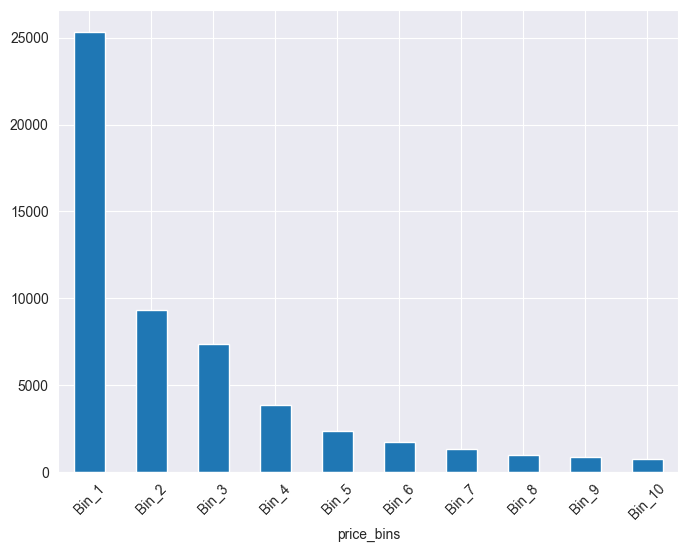

In [9]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)
plt.show()

3.4.2 Equal Frequency Discretization

In [10]:
diamond_data = sns.load_dataset('diamonds')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
discretised_price, bins = pd.qcut(diamond_data['price'],10,labels=None,
                                   retbins=True,precision=3,duplicates='raise')

pd.concat([discretised_price, diamond_data['price']],axis = 1).head(10)



,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [13]:
print(bins)
print(type(bins))

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]
<class 'numpy.ndarray'>


In [25]:
discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [20]:
for i in range(1,len(bins)):
    print(abs(bins[i-1]-bins[i]))


320.0
191.0
250.0
611.0
703.0
1064.0
1197.0
1639.2000000000044
3519.7999999999956
9002.0


In [16]:
bins_labels = ['Bin_' + str(i) for i in range(1,11)]
print(bin_labels)

['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


In [19]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, 
                                    labels=bin_labels, include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_1


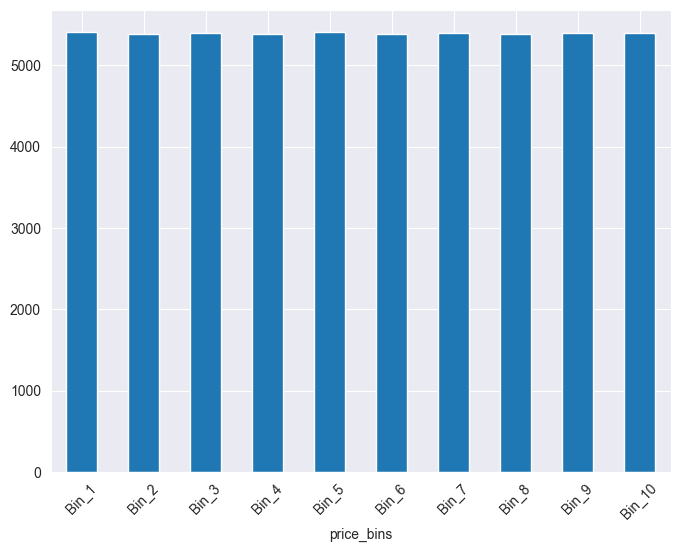

In [26]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)
plt.show()